In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
!pip uninstall fastai -q -y
!pip3 install fastai -q

In [55]:
!pip install git+https://github.com/tmabraham/upit.git >/dev/null

  Running command git clone -q https://github.com/tmabraham/upit.git /tmp/pip-req-build-s3txaf14


In [56]:
import fastai
from fastai.vision.all import *
from fastai.vision.gan import *

In [57]:
from upit.data.unpaired import *
from upit.models.cyclegan import *
from upit.train.cyclegan import *
from upit.inference.cyclegan import *

In [58]:
import shutil
import os

In [59]:
PATH = Path("/content/drive/My Drive/Colab Notebooks/w210/data/PlantVillage")
DATA_DIR = Path("/content/drive/My Drive/Colab Notebooks/w210/data/PlantVillage")
IMG_DIR = PATH/'Tomato'
#IMG_DIR = "/content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/images"
TRAIN_CSV = 'train.csv'
#TRAIN_CSV = "/content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/train.csv"
TEST_CSV = 'test.csv'
#TEST_CSV = "/content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/test.csv"
SS_CSV = 'sample_submission.csv'
#SS_CSV = "/content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/sample_submission.csv"

In this notebook we will explore using CycleGAN to generate more multiple_disease like pictures using healthy pictures for this [Plant Pathology](https://www.kaggle.com/c/plant-pathology-2020-fgvc7) Kaggle competition. One of the biggest challenge in this competition is the relatively low number of multiple_disease pictures.

The process would involve

* creating a new folder (gan pics) containing domainA (healthy pics) and domainB (multiple_diseases) pics
* extend this awesome [package](https://github.com/tmabraham/UPIT/tree/master/upit/train) built using PyTorch and fastai by tmabraham for CycleGAN training. You can find [tuts](https://www.kaggle.com/tanlikesmath/upit-a-package-for-unpaired-img2img-translation) here by the man himself
* train 
* generate multiple_diseases pictures

https://machinelearningmastery.com/what-is-cyclegan/

https://tmabraham.github.io/UPIT/models.cyclegan/

In [43]:
# creating the image folders

In [44]:
#train_df = pd.read_csv(DATA_DIR/TRAIN_CSV)

In [45]:
#train_df[['healthy', 'multiple_diseases', 'rust', 'scab']].sum(axis=0)

healthy              516
multiple_diseases     91
rust                 622
scab                 592
dtype: int64

In [46]:
#healthy_id = train_df[train_df['healthy'] > 0]['image_id'].values

In [47]:
#multdis_id = train_df[train_df['multiple_diseases'] > 0]['image_id'].values

In [48]:
#len(healthy_id), len(multdis_id) 

(516, 91)

In [49]:
#GAN_IMAGE_PATH = DATA_DIR/'gan_images'
#HEALTHY_PATH = GAN_IMAGE_PATH/'healthy'
#MULTDIS_PATH = GAN_IMAGE_PATH/'leaf_mold'

In [50]:
#os.mkdir(GAN_IMAGE_PATH)
#os.mkdir(HEALTHY_PATH)
#os.mkdir(MULTDIS_PATH)

In [51]:
#healthy_fns = [Path(f'{DATA_DIR}/images/train/{x}.jpg') for x in healthy_id]

In [52]:
#multdis_fns = [Path(f'{DATA_DIR}/images/train/{x}.jpg') for x in multdis_id]

In [31]:
#for fn in healthy_fns:
#  shutil.copy(fn, HEALTHY_PATH)

In [32]:
#print(HEALTHY_PATH)

/content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/gan_images/healthy


In [33]:
#for fn in multdis_fns:
#  shutil.copy(fn, MULTDIS_PATH)

In [60]:
# healthy leaf and non-healthy leaf are already seperated. No need for doing above
IMG_IMAGE_PATH = DATA_DIR/'Tomato'
HEALTHY_PATH = IMG_IMAGE_PATH/'Tomato___healthy'
MULTDIS_PATH = IMG_IMAGE_PATH/'Tomato___Leaf_Mold'

#CycleGAN

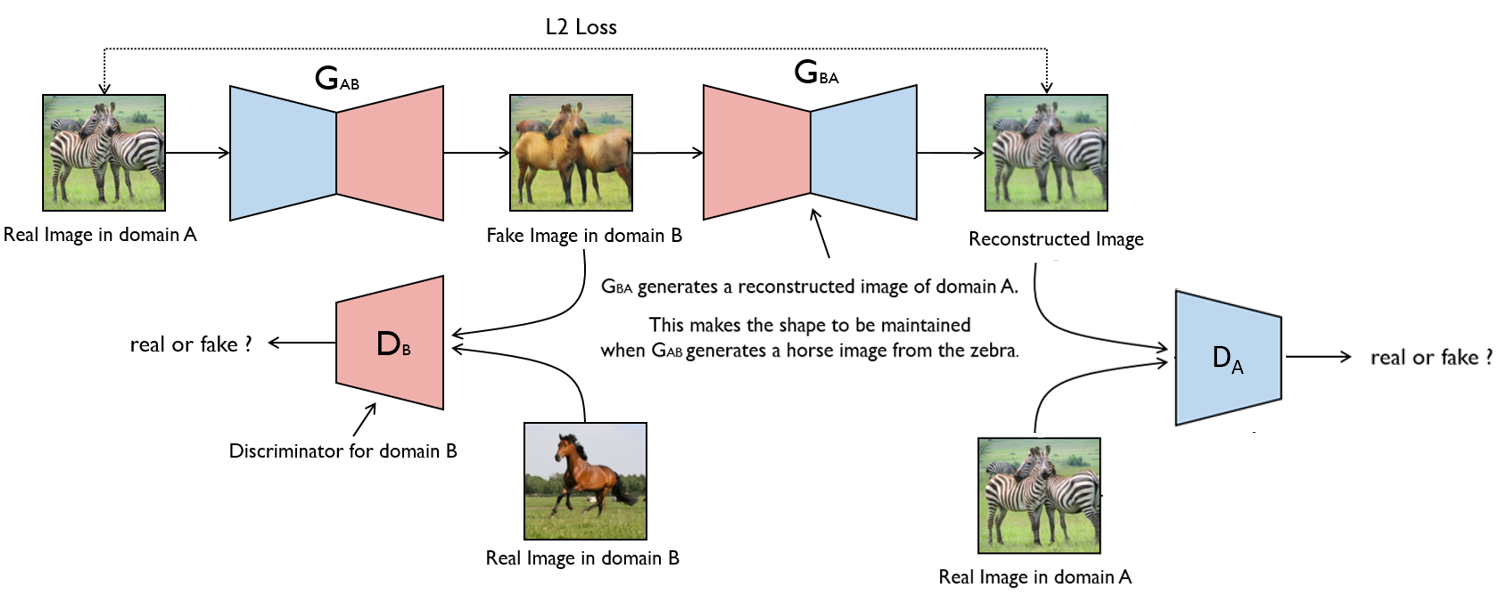

In [61]:
# domain A - can be treated like inputs. in our case the healthy pics
# domain B - is the outpt. in our case is the multiple_diseases
# what we ideally want is to have multiple_disease features on healthy images 
dA_PATH = HEALTHY_PATH
dB_PATH = MULTDIS_PATH

In [62]:
IMG_SIZE = 224 # 300
dls = get_dls(dA_PATH, dB_PATH, load_size=IMG_SIZE, crop_size=IMG_SIZE)

In [63]:
print(dA_PATH)

/content/drive/My Drive/Colab Notebooks/w210/data/PlantVillage/Tomato/Tomato___healthy


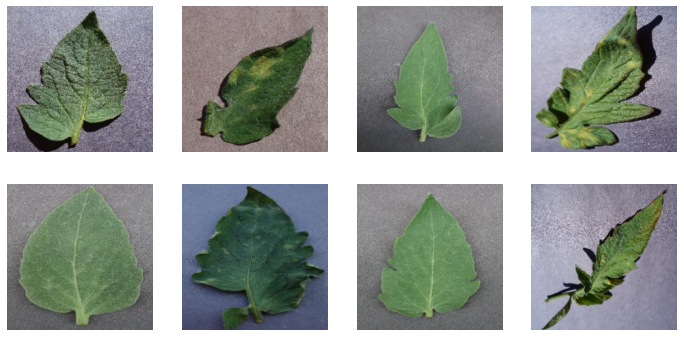

In [64]:
dls.show_batch()

In [65]:
# defining the model
cycle_gan = CycleGAN(3,3,64,gen_blocks=5)

In [66]:
learn = cycle_learner(dls, cycle_gan, opt_func=partial(Adam, mom=0.5,sqr_mom=0.999),show_img_interval=8)

In [ ]:
learn.fit_flat_lin(20, 30, 1e-4, curve_type='cosine')

epoch,train_loss,id_loss_A,id_loss_B,gen_loss_A,gen_loss_B,cyc_loss_A,cyc_loss_B,D_A_loss,D_B_loss,time
0,4.244562,0.665550,0.637016,0.395827,0.345351,1.352160,1.319439,0.225530,0.225530,05:57
1,4.043135,0.559443,0.501323,0.413173,0.378600,1.158667,1.074570,0.201377,0.201377,05:58
2,3.804729,0.507680,0.460065,0.418127,0.389276,1.086566,0.997017,0.200305,0.200305,05:57
3,3.957054,0.489803,0.454835,0.453029,0.405339,1.057445,0.996296,0.185972,0.185972,05:57
4,3.877767,0.472068,0.435807,0.487907,0.430624,1.031570,0.962404,0.170278,0.170278,05:57


/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (G_A) that exists in the learner. Use `self.learn.G_A` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (G_B) that exists in the learner. Use `self.learn.G_B` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribute (D_A) that exists in the learner. Use `self.learn.D_A` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/usr/local/lib/python3.7/dist-packages/fastai/callback/core.py:50: UserWarning: You are shadowing an attribut

In [ ]:
learn.save(f'{DATA_DIR}/model/cyclegan_2')

In [ ]:
#learn.load(f'{DATA_DIR}/model/cyclegan_2')

In [ ]:
b = dls.one_batch()
_,_,preds = learn.get_preds(dl=[b], with_decoded=True)

In [ ]:
dls.show_batch((b[0], b[1]), max_n=2, show=True)
plt.suptitle('Input')
dls.show_batch((preds[1],preds[0]), max_n=2, show=True)
plt.suptitle('Predictions')

In [ ]:
GAN_IMAGE_PATH = DATA_DIR/'gan_images'
TEST_PATH = GAN_IMAGE_PATH/'test_healthy'
#TEST_PATH = DATA_DIR/'test'
PRED_PATH = GAN_IMAGE_PATH/'new_leaf_mold'

In [ ]:
import torchvision
import torchvision.transforms as transforms

In [ ]:
tfms = transforms.Resize(IMG_SIZE)

In [ ]:
def load_dataset(test_path,bs=4,num_workers=4):
    "A helper function for getting a DataLoader for images in the folder `test_path`, with batch size `bs`, and number of workers `num_workers`"
    dataset = FolderDataset(
            path=test_path,
            transforms=[transforms.Resize(IMG_SIZE), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
        )
    loader = torch.utils.data.DataLoader(
            dataset,
            batch_size=bs,
            num_workers=num_workers,
            shuffle=True
        )
    return loader

In [ ]:
dl = load_dataset(str(TEST_PATH))
#dl = load_dataset(str(IMG_DIR/'test'))

In [ ]:
print(dl,type(dl) ,len(dl))

<torch.utils.data.dataloader.DataLoader object at 0x7fce95e21210> <class 'torch.utils.data.dataloader.DataLoader'> 456


In [ ]:
model = learn.model.G_B.cuda()
for i, xb in progress_bar(enumerate(dl),total=len(dl)):
  #print(i, len(xb))
  fn, im = xb
  #print(fn, im)
  #print(fn, len(im))
  preds = (model(im.cuda())/2 + 0.5)
  for i in range(len(fn)):
    #print(i)
    new_fn = os.path.join(str(PRED_PATH),'.'.join([os.path.basename(fn[i]).split('.')[0]+'_fakeB','.jpg']))
    #print(i, new_fn)
    torchvision.utils.save_image(preds[i],new_fn)
    #print(preds[i])

0 2
('/content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/images/test/Test_48.jpg', '/content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/images/test/Test_43.jpg', '/content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/images/test/Test_313.jpg', '/content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/images/test/Test_1461.jpg') 4
0
0 /content/drive/My Drive/Colab Notebooks/w210/plant-pathology-2020-fgvc7/gan_images/new_multdis/Test_48_fakeB..jpg
tensor([[[0.3750, 0.3618, 0.3550,  ..., 0.4275, 0.4442, 0.4752],
         [0.3579, 0.3720, 0.3704,  ..., 0.4587, 0.4377, 0.4521],
         [0.3781, 0.3712, 0.3689,  ..., 0.4391, 0.4495, 0.4388],
         ...,
         [0.5954, 0.5925, 0.5956,  ..., 0.5103, 0.5255, 0.5479],
         [0.5846, 0.5907, 0.5947,  ..., 0.5305, 0.5191, 0.5384],
         [0.5883, 0.5867, 0.5889,  ..., 0.5250, 0.4935, 0.5335]],

        [[0.4838, 0.4784, 0.4914,  ..., 0.5855, 0.5926, 0.5921],
     

RuntimeError: ignored

In [ ]:
preds[0].shape

torch.Size([3, 224, 336])

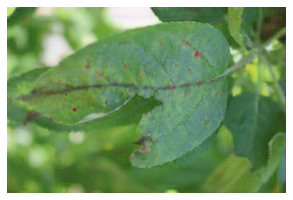

In [ ]:
show_image(preds[0])